# ESTIMACIÓN DE LEYES DE COBRE CON COPULAS GAUSSIANAS
##### Elaborado por el Dr. Marco A. Cotrina Teatino y Ing. Jairo J. Marquina Araujo

## EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bd=pd.read_csv("comp15.csv")
bd.describe()

,X,Y,Z,Cu,Mo,Rock
count,5654.000000,5.654000e+03,5654.000000,5654.000000,5654.000000,5654.00000
mean,375606.249852,8.717016e+06,4473.542001,0.429737,0.014471,2.16307
std,307.236417,3.935425e+02,169.539056,0.289720,0.014551,0.78321
min,374821.062000,8.716003e+06,4050.347000,0.002000,0.000000,1.00000
25%,375393.421750,8.716738e+06,4340.072250,0.227000,0.003000,2.00000
50%,375602.294500,8.716996e+06,4462.814500,0.378000,0.010000,2.00000
75%,375824.991000,8.717272e+06,4607.487250,0.577750,0.021000,3.00000
max,376414.809000,8.718153e+06,4902.138000,2.949000,0.091000,5.00000


In [3]:
moda=bd.mode().iloc[0]
varianza=bd.var()
desviacion_estandar=bd.std()
asimetria=bd.skew()
curtosis=bd.kurtosis()

print("\nModa:\n", moda)
print("\nVarianza:\n", varianza)
print("\nDesviación Estándar:\n", desviacion_estandar)
print("\nCoeficiente de Asimetría (Skewness):\n", asimetria)
print("\nCurtosis:\n", curtosis)


Moda:
 X        375388.763
Y       8716581.218
Z          4230.331
Cu            0.250
Mo            0.000
Rock          2.000
Name: 0, dtype: float64

Varianza:
 X        94394.216020
Y       154875.700375
Z        28743.491431
Cu           0.083937
Mo           0.000212
Rock         0.613417
dtype: float64

Desviación Estándar:
 X       307.236417
Y       393.542501
Z       169.539056
Cu        0.289720
Mo        0.014551
Rock      0.783210
dtype: float64

Coeficiente de Asimetría (Skewness):
 X       0.013735
Y       0.191183
Z       0.069025
Cu      1.212187
Mo      1.443928
Rock    0.781996
dtype: float64

Curtosis:
 X      -0.452782
Y      -0.228229
Z      -0.810563
Cu      2.733709
Mo      2.278739
Rock    1.045682
dtype: float64


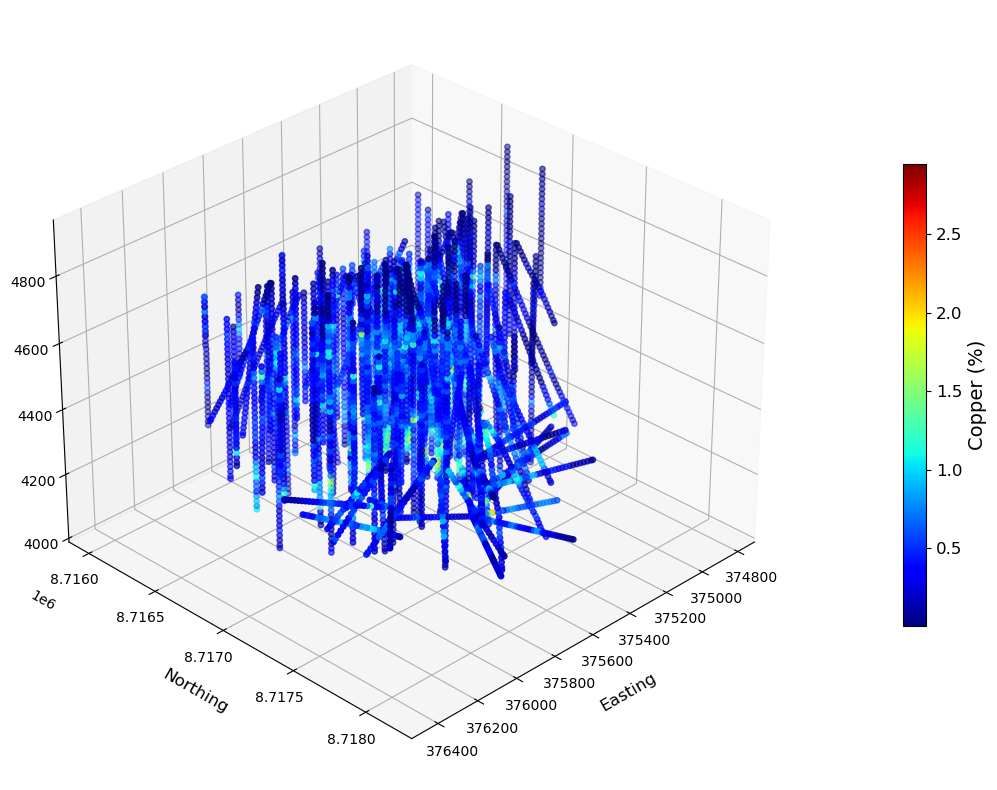

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cargar los datos
bd = pd.read_csv("comp15.csv")  

# Crear la figura y el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot con la columna 'Cu' como gradiente de color
scatter = ax.scatter(
    bd['X'], bd['Y'], bd['Z'], 
    c=bd['Cu'], cmap='jet', s=15  
)

# Etiquetas de los ejes
ax.set_xlabel('Easting', fontsize=12, labelpad=10)
ax.set_ylabel('Northing', fontsize=12, labelpad=10)
ax.set_zlabel('Elevation', fontsize=12, labelpad=10)

# Barra de color para la ley de cobre
cb = fig.colorbar(scatter, ax=ax, shrink=0.6, pad=0.1)
cb.set_label('Copper (%)', fontsize=14)
cb.ax.tick_params(labelsize=12)

# Título del gráfico
ax.set_title('', fontsize=14, fontweight='bold')

# Ajustar la vista 3D
ax.view_init(elev=30, azim=45)  

# Mostrar el gráfico
plt.tight_layout()
plt.savefig('3d.jpg', dpi=800)
plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
import kmodes.util 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import seaborn as sns
import plotly.express as px

plt.style.use("_classic_test_patch")

df = pd.read_csv("bloques.csv", sep=",")
df.head()

,OK,OK_average_sampe_distance,OK_krig_var,OK_n_samples
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [6]:
grid_x = np.linspace(374780,376430, num=55, endpoint=False) #Coord. de origen x, coord. de termino x, nª de celdas x.
grid_y = np.linspace(8715970,8718190, num=74, endpoint=False) #Coord. de origen y, coord. de termino y, nª de celdas y.
grid_z = np.linspace(4010,4940, num=31, endpoint=False) #Coord. de origen x, coord. de termino y, nª de celdas z.

zg, yg, xg = np.meshgrid(grid_z, grid_y, grid_x, indexing='ij')

z_g = zg.ravel()
x_g = xg.ravel()
y_g = yg.ravel()

d = {'X': x_g, 'Y': y_g, "Z": z_g}
df1 = pd.DataFrame(data=d) #Creación del dataframe 
       
df["X"] = df1["X"]
df["Y"] = df1["Y"]
df["Z"] = df1["Z"]

df.head()

,OK,OK_average_sampe_distance,OK_krig_var,OK_n_samples,X,Y,Z
0,NaN,NaN,NaN,NaN,374780.0,8715970.0,4010.0
1,NaN,NaN,NaN,NaN,374810.0,8715970.0,4010.0
2,NaN,NaN,NaN,NaN,374840.0,8715970.0,4010.0
3,NaN,NaN,NaN,NaN,374870.0,8715970.0,4010.0
4,NaN,NaN,NaN,NaN,374900.0,8715970.0,4010.0


In [7]:
df.loc[df["OK"] < 0.002, "OK"] = -99
df.replace(-99, np.nan, inplace=True)
df= df.dropna()
df.head()

,OK,OK_average_sampe_distance,OK_krig_var,OK_n_samples,X,Y,Z
23,0.091000,342.956,0.172486,1.0,375470.0,8715970.0,4010.0
24,0.113687,331.485,0.159043,2.0,375500.0,8715970.0,4010.0
25,0.097154,323.590,0.151210,3.0,375530.0,8715970.0,4010.0
26,0.097182,314.030,0.150476,3.0,375560.0,8715970.0,4010.0
27,0.111267,311.970,0.145047,4.0,375590.0,8715970.0,4010.0


In [8]:
# Configuración global para pandas (afectará a todo el script)
pd.options.display.float_format = '{:.6f}'.format

# Imprimir el resumen estadístico
print(df.describe().T)

                                  count           mean        std  \
OK                        112570.000000       0.317923   0.165212   
OK_average_sampe_distance 112570.000000     173.577800 103.319300   
OK_krig_var               112570.000000       0.081893   0.029793   
OK_n_samples              112570.000000      11.618229   1.686360   
X                         112570.000000  375607.056854 457.413429   
Y                         112570.000000 8717004.764147 600.134246   
Z                         112570.000000    4443.537443 257.332751   

                                     min            25%            50%  \
OK                              0.003352       0.213670       0.297443   
OK_average_sampe_distance      20.301800      83.538500     150.206000   
OK_krig_var                     0.024464       0.054996       0.083629   
OK_n_samples                    1.000000      12.000000      12.000000   
X                          374780.000000  375230.000000  375620.000000   
Y  

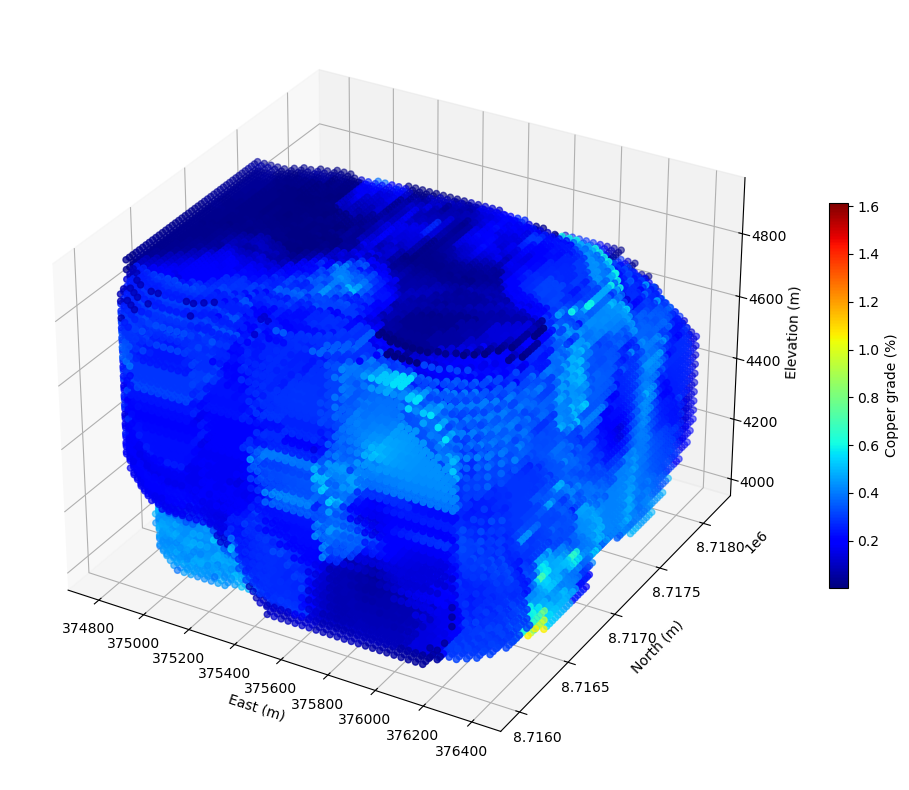

In [9]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Configuración de estilo y tamaño de fuente
rcParams['font.family'] = 'sans-serif'  
rcParams['font.size'] = 10             

# Extraer las columnas X, Y, Z y OK para graficar
X = df['X']
Y = df['Y']
Z = df['Z']
OK = df['OK']

# Crear la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear una dispersión 3D
sc = ax.scatter(X, Y, Z, c=OK, cmap='jet', marker='o')

# Añadir la barra de color
cbar = fig.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label('Copper grade (%)', fontsize=10)  
cbar.ax.tick_params(labelsize=10)       

# Etiquetas de los ejes
ax.set_xlabel('East (m)', fontsize=10)  
ax.set_ylabel('North (m)', fontsize=10)
ax.set_zlabel('Elevation (m)', fontsize=10)
# Tamaño más pequeño para los números de los ejes
ax.tick_params(axis='x', labelsize=10)  
ax.tick_params(axis='y', labelsize=10) 
ax.tick_params(axis='z', labelsize=10)  


# Mostrar gráfico con un diseño ajustado
plt.tight_layout()
plt.savefig('3d modelo ok.jpg', dpi=800)
# Mostrar la gráfica
plt.show()

In [10]:
valores_unicos_Z = df["Z"].unique()
print(valores_unicos_Z)

[4010. 4040. 4070. 4100. 4130. 4160. 4190. 4220. 4250. 4280. 4310. 4340.
 4370. 4400. 4430. 4460. 4490. 4520. 4550. 4580. 4610. 4640. 4670. 4700.
 4730. 4760. 4790. 4820. 4850. 4880. 4910.]


In [11]:
valores_unicos_Y = df["Y"].unique()
print(valores_unicos_Y)

[8715970. 8716000. 8716030. 8716060. 8716090. 8716120. 8716150. 8716180.
 8716210. 8716240. 8716270. 8716300. 8716330. 8716360. 8716390. 8716420.
 8716450. 8716480. 8716510. 8716540. 8716570. 8716600. 8716630. 8716660.
 8716690. 8716720. 8716750. 8716780. 8716810. 8716840. 8716870. 8716900.
 8716930. 8716960. 8716990. 8717020. 8717050. 8717080. 8717110. 8717140.
 8717170. 8717200. 8717230. 8717260. 8717290. 8717320. 8717350. 8717380.
 8717410. 8717440. 8717470. 8717500. 8717530. 8717560. 8717590. 8717620.
 8717650. 8717680. 8717710. 8717740. 8717770. 8717800. 8717830. 8717860.
 8717890. 8717920. 8717950. 8717980. 8718010. 8718040. 8718070. 8718100.
 8718130. 8718160.]


In [12]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Copia de seguridad de los datos originales de sondajes
bd["Cu_original"] = bd["Cu"].copy()

# Transformación a distribución uniforme en la base de sondajes
# Usamos el ranking de los datos para crear una distribución uniforme
bd["Cu_uniform"] = stats.rankdata(bd["Cu"]) / len(bd["Cu"])

# Transformación a distribución gaussiana usando la función de cuantil inversa
bd["Cu_gaussian"] = stats.norm.ppf(bd["Cu_uniform"])
# Verificación rápida de los resultados
print("Sondajes - Distribución Transformada:")
print(bd[["Cu", "Cu_uniform", "Cu_gaussian"]].head())

# Guardar los datos transformados para futuras etapas
bd.to_csv("bd_transformed.csv", index=False)

Sondajes - Distribución Transformada:
        Cu  Cu_uniform  Cu_gaussian
0 0.034000    0.042802    -1.719062
1 0.018000    0.032013    -1.852002
2 0.007000    0.012115    -2.253452
3 0.027000    0.037672    -1.778359
4 0.008000    0.015476    -2.157695


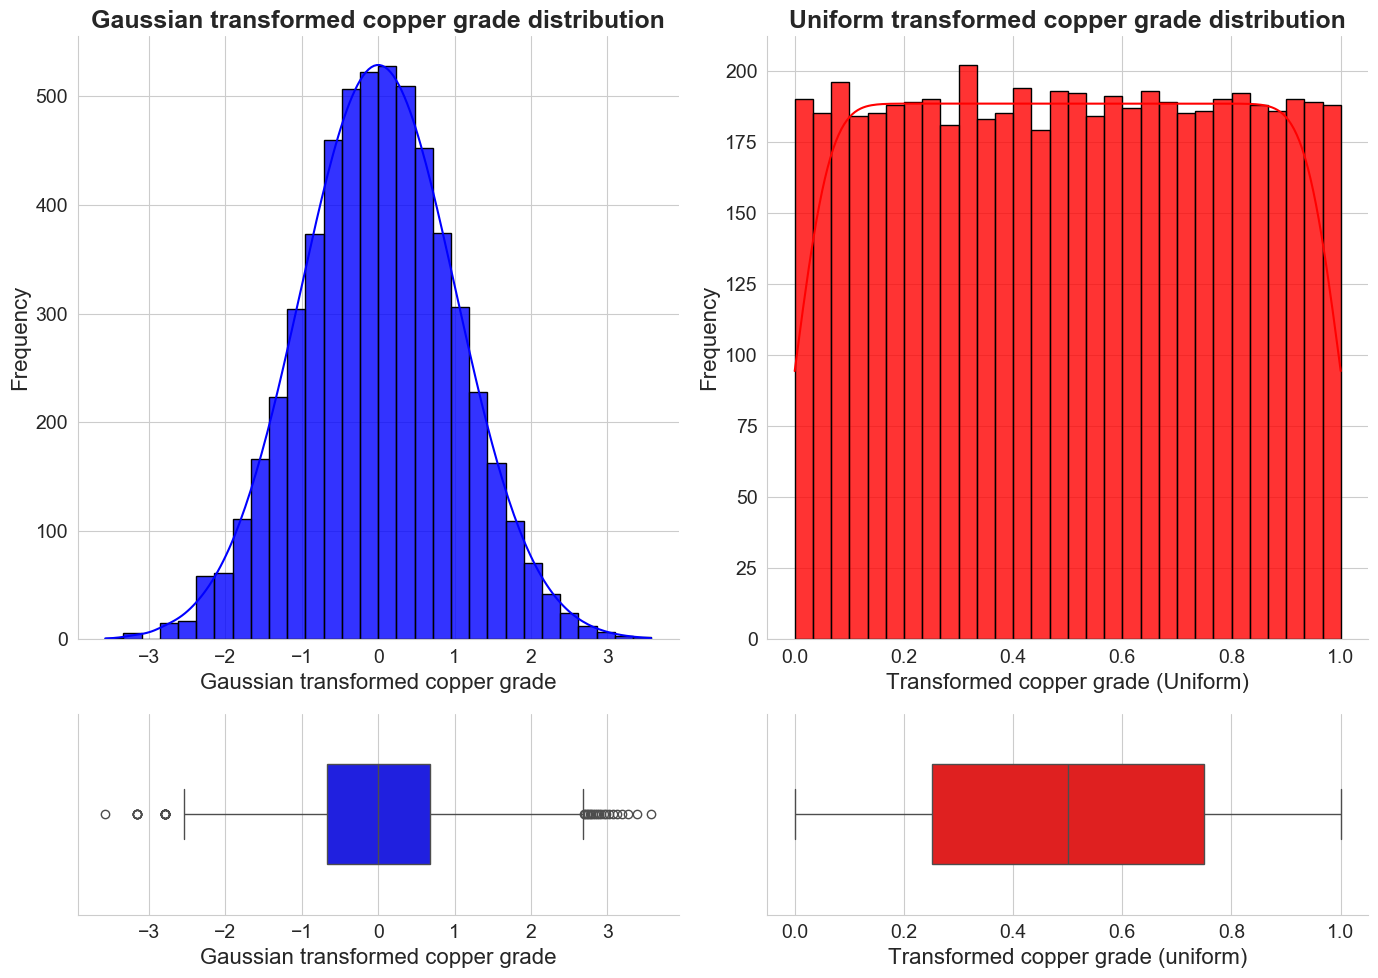

In [13]:
# Configuración del estilo para gráficos tipo Q1
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 14,           
    'axes.labelsize': 16,        
    'axes.titlesize': 18,        
    'xtick.labelsize': 14,       
    'ytick.labelsize': 14,       
    'legend.fontsize': 14,       
    'figure.figsize': (14, 10),  
    'axes.spines.top': False,    
    'axes.spines.right': False   
})

# Crear figura con subgráficos (histogramas arriba, boxplots abajo)
fig, axes = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'height_ratios': [3, 1]})

# Paleta de colores profesionales
color_original = "green"  
color_transformed = "red" 
color_gaussian = "blue"  

# Histograma de la Ley de Cobre Transformada (Distribución Gaussiana)
sns.histplot(bd["Cu_gaussian"], bins=30, kde=True, ax=axes[0, 0], color=color_gaussian, edgecolor='black', alpha=0.8)
axes[0, 0].set_title("Gaussian transformed copper grade distribution", fontsize=18, fontweight='bold')
axes[0, 0].set_xlabel("Gaussian transformed copper grade", fontsize=16)
axes[0, 0].set_ylabel("Frequency", fontsize=16)

# Boxplot de la Ley de Cobre Transformada (Distribución Gaussiana)
sns.boxplot(x=bd["Cu_gaussian"], ax=axes[1, 0], color=color_gaussian, width=0.5)
axes[1, 0].set_xlabel("Gaussian transformed copper grade", fontsize=16)

# Histograma de la Ley de Cobre Transformada (Distribución Uniforme)
sns.histplot(bd["Cu_uniform"], bins=30, kde=True, ax=axes[0, 1], color=color_transformed, edgecolor='black', alpha=0.8)
axes[0, 1].set_title("Uniform transformed copper grade distribution", fontsize=18, fontweight='bold')
axes[0, 1].set_xlabel("Transformed copper grade (Uniform)", fontsize=16)
axes[0, 1].set_ylabel("Frequency", fontsize=16)

# Boxplot de la Ley de Cobre Transformada (Distribución Uniforme)
sns.boxplot(x=bd["Cu_uniform"], ax=axes[1, 1], color=color_transformed, width=0.5)
axes[1, 1].set_xlabel("Transformed copper grade (uniform)", fontsize=16)

# Ajustar espacio entre los gráficos
plt.tight_layout()


plt.savefig("Copper_Grade_Transformation_Q1.jpg", dpi=800, bbox_inches='tight')

# Mostrar la figura
plt.show()



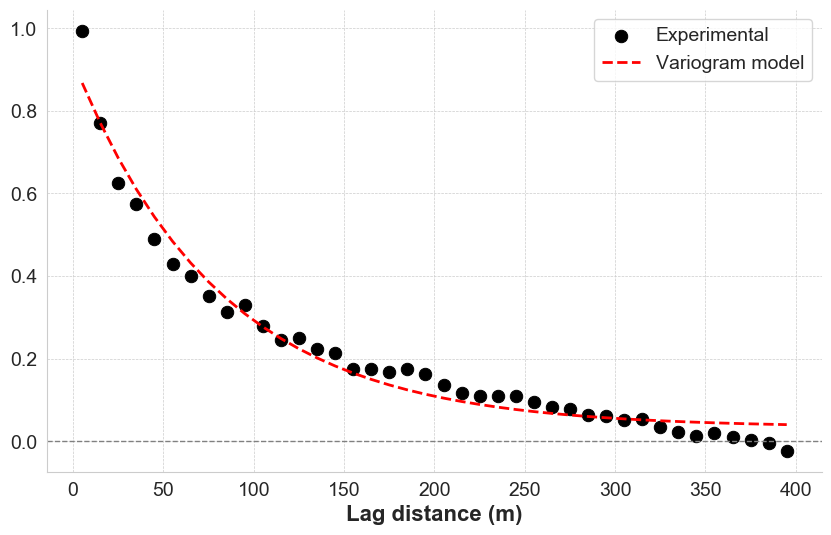

Fitted Correlogram Parameters: {'nugget': 0.03315988031426076, 'sill': 0.8874573554417641, 'range': 81.25396362310663}


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import curve_fit

# Definir función del modelo de correlograma exponencial
def correlogram_model(h, nugget, sill, range_):
    return nugget + sill * np.exp(-h / range_)

# Calcular matriz de distancias entre puntos de perforación
coords = bd[['X', 'Y', 'Z']].values  
dist_matrix = squareform(pdist(coords))  

# Definir lags (distancias espaciales) a analizar
lags = np.arange(5, 400, 10)  

# Calcular correlograma experimental
correlogram = []
for lag in lags:
    pares = np.where((dist_matrix >= lag - 5) & (dist_matrix < lag + 5))  # Ventana ±5m
    valores_1 = bd["Cu_uniform"].values[pares[0]]
    valores_2 = bd["Cu_uniform"].values[pares[1]]
    
    if len(valores_1) > 0:
        correlacion = np.corrcoef(valores_1, valores_2)[0, 1]
        correlogram.append(correlacion)
    else:
        correlogram.append(np.nan)

# Ajustar modelo de correlograma exponencial
popt, _ = curve_fit(correlogram_model, lags, np.nan_to_num(correlogram, nan=0.0), p0=[0.1, 0.9, 50])

# Configuración del estilo gráfico profesional
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.figsize': (10, 6),
    'axes.spines.top': False,
    'axes.spines.right': False
})

# Graficar el correlograma experimental y su ajuste
fig, ax = plt.subplots(figsize=(10, 6))

# Correlograma experimental (puntos)
sns.scatterplot(x=lags, y=correlogram, color='black', label="Experimental", s=80, edgecolor='black')

# Modelo ajustado (línea roja discontinua)
ax.plot(lags, correlogram_model(lags, *popt), color='red', linestyle="--", linewidth=2, label="Variogram model")

# Línea base en y=0
ax.axhline(0, color="gray", linestyle="--", linewidth=1)

# Etiquetas y título
ax.set_xlabel("Lag distance (m)", fontsize=16, fontweight='bold')
ax.set_ylabel("", fontsize=16, fontweight='bold')
ax.set_title("", fontsize=18, fontweight='bold')

# Leyenda y cuadrícula
ax.legend(fontsize=14, loc="upper right")
ax.grid(True, linestyle="--", linewidth=0.5)

# Guardar la figura en alta resolución
plt.savefig("Correlogram_Copper_Grade_Q1.jpg", dpi=800, bbox_inches='tight')

# Mostrar la figura
plt.show()

# Guardar los parámetros ajustados
correlogram_params = {"nugget": popt[0], "sill": popt[1], "range": popt[2]}
print("Fitted Correlogram Parameters:", correlogram_params)

In [15]:
# 3) Selección de datos vecinos
optimal_NCD = 17
optimal_range = 81.25
coords_df = df[['X', 'Y', 'Z']].values
num_blocks = len(df)
estimated_values = []

In [16]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.spatial.distance import cdist
from scipy.optimize import curve_fit
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(num_blocks):
    dists = cdist(coords_df[i].reshape(1, -1), coords).flatten()
    nearest_indices = np.argsort(dists)[:optimal_NCD]
    nearest_neighbors = bd.iloc[nearest_indices]
    estimated_uniform = nearest_neighbors["Cu_uniform"].mean()
    estimated_original = np.quantile(bd["Cu"], estimated_uniform)
    estimated_values.append(estimated_original)

df["Cu_estimated_GC"] = estimated_values

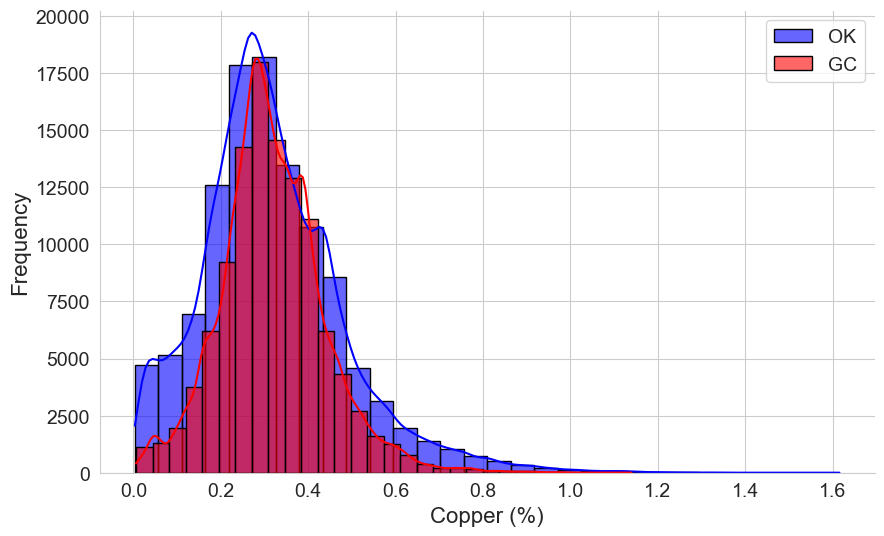

In [17]:
# Configuración de estilo para gráficos
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.figsize': (10, 6),
    'axes.spines.top': False,
    'axes.spines.right': False
})

# Graficar histogramas con líneas de distribución
fig, ax = plt.subplots(figsize=(10, 6))

# Histograma y KDE para OK
sns.histplot(df["OK"], bins=30, kde=True, color='blue', alpha=0.6, label="OK", edgecolor='black')

# Histograma y KDE para GC
sns.histplot(df["Cu_estimated_GC"], bins=30, kde=True, color='red', alpha=0.6, label="GC", edgecolor='black')

# Etiquetas y título
ax.set_xlabel("Copper (%)", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_title("", fontsize=18, fontweight='bold')

# Leyenda
ax.legend(fontsize=14, loc="upper right")

# Guardar la figura en alta resolución
plt.savefig("Comparison_OK_GC_Histogram.jpg", dpi=800, bbox_inches='tight')

# Mostrar la figura
plt.show()

In [19]:
bd = bd.reset_index(drop=True)
df = df.reset_index(drop=True)


In [20]:
# 5) Comparación de métricas Jackknife entre OK y GC
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_list_gc, mae_list_gc, mbe_list_gc = [], [], []
mse_list_ok, mae_list_ok, mbe_list_ok = [], [], []

for train_index, test_index in kf.split(bd):
    train_data = bd.iloc[train_index]
    test_data = bd.iloc[test_index]
    predictions_gc, predictions_ok, actuals = [], [], []
    
    for idx in test_index:
        dists = dist_matrix[idx, train_index]
        nearest_indices = train_index[np.argsort(dists)[:optimal_NCD]]
        nearest_neighbors = bd.iloc[nearest_indices]
        estimated_gc = nearest_neighbors["Cu_uniform"].mean()
        estimated_gc = np.quantile(bd["Cu"], estimated_gc)
        estimated_ok = df.loc[idx, "OK"]
        predictions_gc.append(estimated_gc)
        predictions_ok.append(estimated_ok)
        actuals.append(bd.loc[idx, "Cu"])
    
    mse_list_gc.append(mean_squared_error(actuals, predictions_gc))
    mae_list_gc.append(mean_absolute_error(actuals, predictions_gc))
    mbe_list_gc.append(np.mean(np.array(actuals) - np.array(predictions_gc)))
    
    mse_list_ok.append(mean_squared_error(actuals, predictions_ok))
    mae_list_ok.append(mean_absolute_error(actuals, predictions_ok))
    mbe_list_ok.append(np.mean(np.array(actuals) - np.array(predictions_ok)))

print("\nJackknife Validation Results:")
print("GC - MSE:", np.mean(mse_list_gc), "MAE:", np.mean(mae_list_gc), "MBE:", np.mean(mbe_list_gc))
print("OK - MSE:", np.mean(mse_list_ok), "MAE:", np.mean(mae_list_ok), "MBE:", np.mean(mbe_list_ok))




Jackknife Validation Results:
GC - MSE: 0.04964275809094397 MAE: 0.15875820478651576 MBE: 0.03043425286868458
OK - MSE: 0.1256000440804511 MAE: 0.2643740086414091 MBE: 0.1442364775161929


In [21]:

mean_real = np.mean(bd["Cu"])
mean_gc = np.mean(df["Cu_estimated_GC"])
mean_ok = np.mean(df["OK"])

bias_factor_gc = (mean_real - mean_gc) * 0.9
df["Cu_estimated_GC_corrected"] = df["Cu_estimated_GC"] + bias_factor_gc

bias_factor_ok = (mean_real - mean_ok) * 0.9
df["OK_corrected"] = df["OK"] + bias_factor_ok

mbe_gc_corrected = np.mean(bd["Cu"] - df["Cu_estimated_GC_corrected"])
mbe_ok_corrected = np.mean(bd["Cu"] - df["OK_corrected"])

print("Nuevo MBE para GC después de la corrección:", mbe_gc_corrected)
print("Nuevo MBE para OK después de la corrección:", mbe_ok_corrected)

while mbe_gc_corrected > 0:
    df["Cu_estimated_GC_corrected"] += 0.01
    mbe_gc_corrected = np.mean(bd["Cu"] - df["Cu_estimated_GC_corrected"])

while mbe_ok_corrected > 0:
    df["OK_corrected"] += 0.01
    mbe_ok_corrected = np.mean(bd["Cu"] - df["OK_corrected"])

print("MBE corregido iterativamente:")
print("GC - MBE:", mbe_gc_corrected)
print("OK - MBE:", mbe_ok_corrected)

Nuevo MBE para GC después de la corrección: 0.03728288091726424
Nuevo MBE para OK después de la corrección: 0.04360357125153677
MBE corregido iterativamente:
GC - MBE: -0.002717119082735798
OK - MBE: -0.0063964287484632705


In [22]:
df.describe()

,OK,OK_average_sampe_distance,OK_krig_var,OK_n_samples,X,Y,Z,Cu_estimated_GC,Cu_estimated_GC_corrected,OK_corrected
count,112570.000000,112570.000000,112570.000000,112570.000000,112570.000000,112570.000000,112570.000000,112570.000000,112570.000000,112570.000000
mean,0.317923,173.577800,0.081893,11.618229,375607.056854,8717004.764147,4443.537443,0.318810,0.458645,0.468556
std,0.165212,103.319300,0.029793,1.686360,457.413429,600.134246,257.332751,0.119248,0.119248,0.165212
min,0.003352,20.301800,0.024464,1.000000,374780.000000,8715970.000000,4010.000000,0.006000,0.145835,0.153985
25%,0.213670,83.538500,0.054996,12.000000,375230.000000,8716480.000000,4220.000000,0.246482,0.386317,0.364303
50%,0.297443,150.206000,0.083629,12.000000,375620.000000,8716990.000000,4430.000000,0.310000,0.449835,0.448076
75%,0.406905,247.583750,0.105328,12.000000,376010.000000,8717500.000000,4670.000000,0.387000,0.526835,0.557538
max,1.615650,493.434000,0.172875,12.000000,376400.000000,8718160.000000,4910.000000,1.139932,1.279766,1.766283


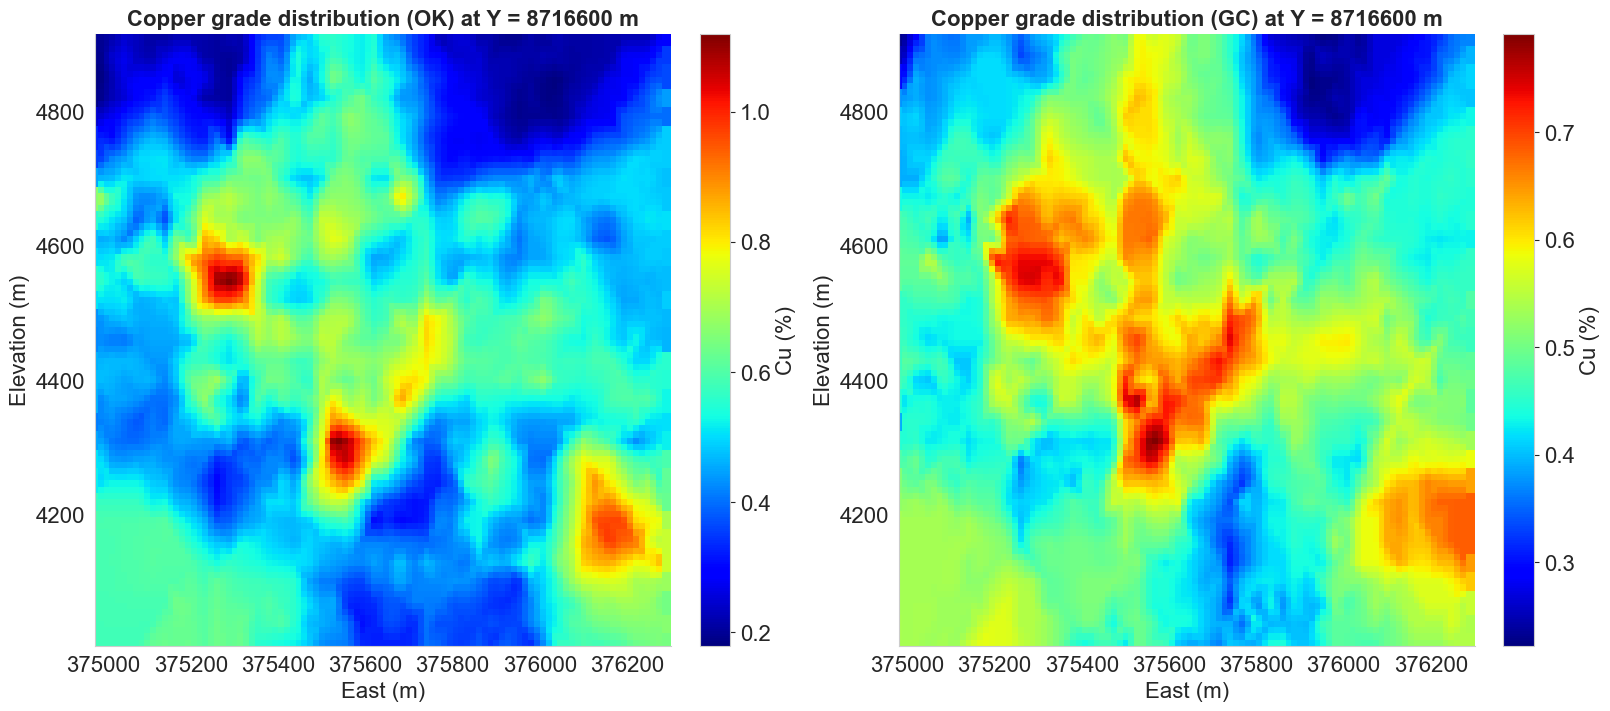

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.ticker as ticker
import seaborn as sns

# 📌 Configurar estilo profesional
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 16,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16,
    'figure.figsize': (16, 7),  # Aumentar tamaño para mejor visualización
    'axes.spines.top': False,
    'axes.spines.right': False
})

# 📌 Extraer las columnas necesarias
X = df['X'].values
Y = df['Y'].values
Z = df['Z'].values
OK = df['OK_corrected'].values  # Valores estimados con Kriging Ordinario (OK)
GC = df['Cu_estimated_GC_corrected'].values  # Valores estimados con Cópula Gaussiana (GC)

# 📌 Definir la sección Y y el rango específico de X
y_level = 8716600
x_min, x_max = 374980, 376300  # Rango en X

# 📌 Filtrar los datos para el nivel de corte en Y y el rango de X
mask = (Y >= y_level) & (Y < y_level + 50) & (X >= x_min) & (X <= x_max)
X_slice = X[mask]
Z_slice = Z[mask]
OK_slice = OK[mask]
GC_slice = GC[mask]

# 📌 Crear malla para interpolar en el rango ajustado de X
xi = np.linspace(x_min, x_max, 100)  # Usar los límites especificados
zi = np.linspace(Z_slice.min(), Z_slice.max(), 100)
xi, zi = np.meshgrid(xi, zi)

# 📌 Interpolación de OK
yi_ok = griddata((X_slice, Z_slice), OK_slice, (xi, zi), method='linear')
yi_ok_nearest = griddata((X_slice, Z_slice), OK_slice, (xi, zi), method='nearest')
yi_ok[np.isnan(yi_ok)] = yi_ok_nearest[np.isnan(yi_ok)]

# 📌 Interpolación de GC
yi_gc = griddata((X_slice, Z_slice), GC_slice, (xi, zi), method='linear')
yi_gc_nearest = griddata((X_slice, Z_slice), GC_slice, (xi, zi), method='nearest')
yi_gc[np.isnan(yi_gc)] = yi_gc_nearest[np.isnan(yi_gc)]

# 📌 Crear la figura con dos subplots (OK vs GC)
fig, axs = plt.subplots(1, 2, figsize=(16, 7), constrained_layout=True)  # 1 fila, 2 columnas

# 📌 Gráfico de Ordinary Kriging (OK)
c1 = axs[0].pcolormesh(xi, zi, yi_ok, cmap='jet', shading='auto')
fig.colorbar(c1, ax=axs[0], label='Cu (%)')
axs[0].set_xlim(x_min, x_max)
axs[0].xaxis.set_major_locator(ticker.MaxNLocator(7))
axs[0].set_title(f'Copper grade distribution (OK) at Y = {y_level} m', fontsize=16, fontweight='bold')
axs[0].set_xlabel('East (m)', fontsize=16)
axs[0].set_ylabel('Elevation (m)', fontsize=16)

# 📌 Gráfico de Gaussian Copula (GC)
c2 = axs[1].pcolormesh(xi, zi, yi_gc, cmap='jet', shading='auto')
fig.colorbar(c2, ax=axs[1], label='Cu (%)')
axs[1].set_xlim(x_min, x_max)
axs[1].xaxis.set_major_locator(ticker.MaxNLocator(7))
axs[1].set_title(f'Copper grade distribution (GC) at Y = {y_level} m', fontsize=16, fontweight='bold')
axs[1].set_xlabel('East (m)', fontsize=16)
axs[1].set_ylabel('Elevation (m)', fontsize=16)

# 📌 Guardar la figura en alta resolución
plt.savefig("Copper_Comparison_OK_vs_GC_Y_8716600.jpg", dpi=800, bbox_inches='tight')

# 📌 Mostrar la gráfica
plt.show()

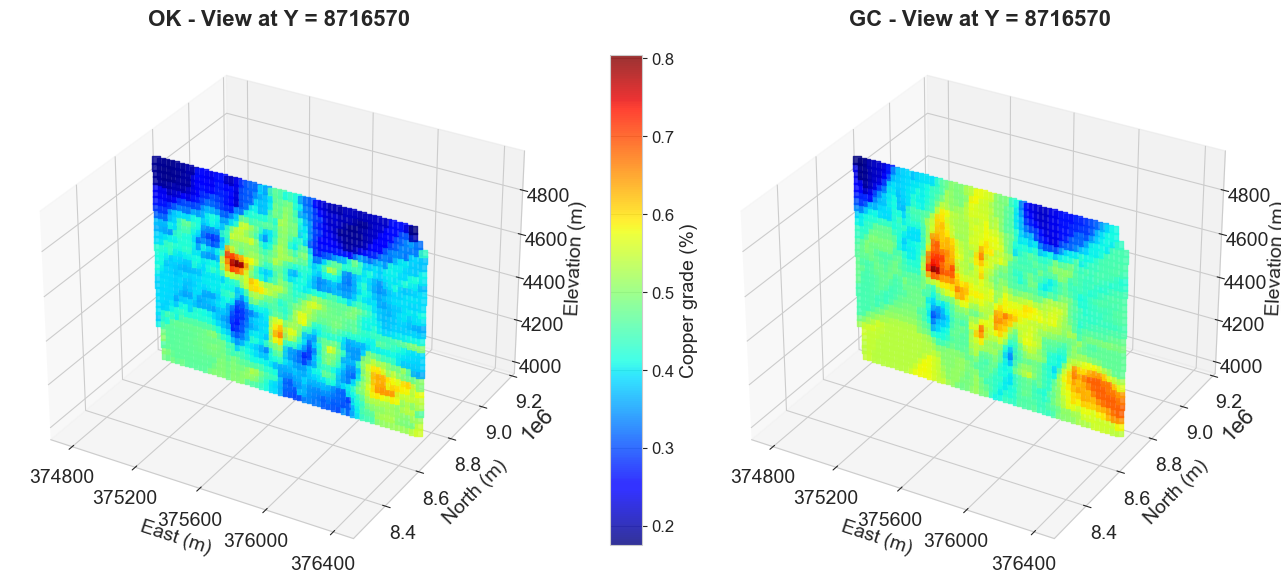

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib.ticker import MaxNLocator  # Controlar el número de ticks en los ejes

# 📌 Configuración de estilo profesional para paper Q1
sns.set_style("whitegrid")
rcParams['font.family'] = 'sans-serif'  
rcParams['font.size'] = 12             
rcParams['axes.labelsize'] = 14        
rcParams['axes.titlesize'] = 16        
rcParams['legend.fontsize'] = 14       

# 📌 Extraer las columnas necesarias
X = df['X'].values
Y = df['Y'].values
Z = df['Z'].values
OK = df['OK_corrected'].values  
GC = df['Cu_estimated_GC_corrected'].values  
 

# 📌 Definir el corte en Y = 8716990
y_cut = 8716570
tolerance = 25  # Rango de tolerancia para el corte

# 📌 Filtrar datos para el corte en Y
mask = (Y >= y_cut - tolerance) & (Y <= y_cut + tolerance)
X_cut, Y_cut, Z_cut = X[mask], Y[mask], Z[mask]
OK_cut, GC_cut = OK[mask], GC[mask]

# 📌 Crear figura y subplots en orientación horizontal (1 fila, 2 columnas)
fig, axs = plt.subplots(1, 2, figsize=(16, 7), subplot_kw={'projection': '3d'})

# 📌 Configuración de colormap
colormap = 'jet'  # Usar 'jet' para mayor contraste

# 📌 Gráfico 3D de Ordinary Kriging (OK)
sc1 = axs[0].scatter(X_cut, Y_cut, Z_cut, c=OK_cut, cmap=colormap, marker='s', alpha=0.8, s=30)
axs[0].set_title(f'OK - View at Y = {y_cut}', fontweight='bold')
axs[0].set_xlabel('East (m)', fontsize=14)
axs[0].set_ylabel('North (m)', fontsize=14)
axs[0].set_zlabel('Elevation (m)', fontsize=14)

# 📌 Gráfico 3D de Gaussian Copula (GC)
sc2 = axs[1].scatter(X_cut, Y_cut, Z_cut, c=GC_cut, cmap=colormap, marker='s', alpha=0.8, s=30)
axs[1].set_title(f'GC - View at Y = {y_cut}', fontweight='bold')
axs[1].set_xlabel('East (m)', fontsize=14)
axs[1].set_ylabel('North (m)', fontsize=14)
axs[1].set_zlabel('Elevation (m)', fontsize=14)

# 📌 Ajustar el número de valores en el eje X a 5
for ax in axs:
    ax.xaxis.set_major_locator(MaxNLocator(5))  
    ax.yaxis.set_major_locator(MaxNLocator(6))  
    ax.zaxis.set_major_locator(MaxNLocator(6))  
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.tick_params(axis='z', labelsize=14)

# 📌 Barra de color centrada entre los dos gráficos
cbar_ax = fig.add_axes([0.50, 0.15, 0.02, 0.7])  
cbar = fig.colorbar(sc2, cax=cbar_ax)
cbar.set_label('Copper grade (%)', fontsize=14)
cbar.ax.tick_params(labelsize=12)  

# 📌 Ajustar diseño y guardar imagen en alta calidad
plt.subplots_adjust(wspace=0.3)  # Ajuste del espacio entre gráficos
plt.savefig('3D_Model_OK_vs_GC_Y_Cut_816660_Centered_Legend.jpg', dpi=800, bbox_inches='tight')

# 📌 Mostrar la gráfica
plt.show()


C:\Users\jhona\AppData\Local\Temp\ipykernel_16128\27752033.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


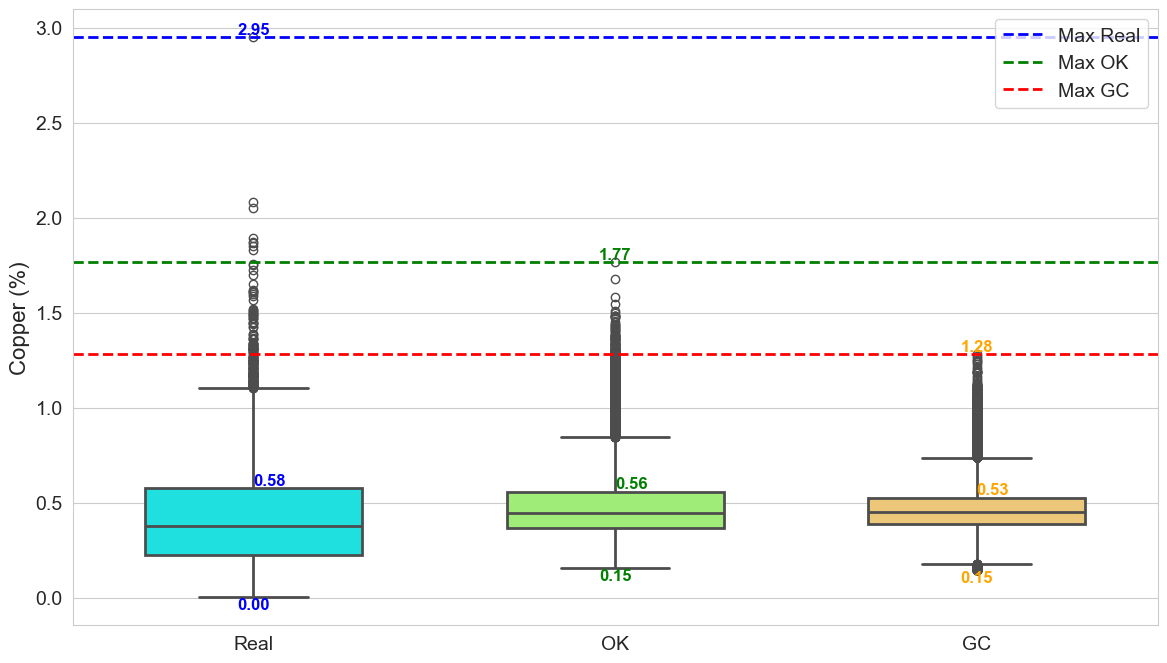

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 📌 Crear DataFrame con los valores reales, OK y estimados con Cópulas
boxplot_data = pd.DataFrame({
    "Copper Grade (%)": list(bd["Cu"]) + list(df["OK_corrected"]) + list(df["Cu_estimated_GC_corrected"]),
    "Type": (["Real"] * len(bd)) + 
            (["OK"] * len(df)) + 
            (["GC"] * len(df))  
})

# 📌 Calcular valores de interés (percentiles 25, 50 y 75, mínimo y máximo)
stats_real = bd["Cu"].describe(percentiles=[0.25, 0.5, 0.75])
stats_ok = df["OK_corrected"].describe(percentiles=[0.25, 0.5, 0.75])
stats_gc = df["Cu_estimated_GC_corrected"].describe(percentiles=[0.25, 0.5, 0.75])

# 📌 Configuración de colores adecuados
colors = {
    "Real": "#00FFFF",  # Azul
    "OK": "#99FF66",  # Verde
    "GC": "#FFCC66"  # Naranja
}

# 📌 Configurar estilo profesional
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))  # Aumentar tamaño para mejor visualización

# 📌 Crear boxplot con etiquetas corregidas
sns.boxplot(
    x="Type", y="Copper Grade (%)", data=boxplot_data,
    width=0.6, linewidth=2, palette=colors
)

# 📌 Añadir líneas horizontales en los valores máximos de cada distribución
plt.axhline(stats_real["max"], color="blue", linestyle="dashed", linewidth=2, label="Max Real")
plt.axhline(stats_ok["max"], color="green", linestyle="dashed", linewidth=2, label="Max OK")
plt.axhline(stats_gc["max"], color="red", linestyle="dashed", linewidth=2, label="Max GC")

# 📌 Añadir etiquetas con valores en los extremos del boxplot
for i, (stats, color) in enumerate(zip([stats_real, stats_ok, stats_gc], ["blue", "green", "orange"])):
    plt.text(i, stats["75%"], f"{stats['75%']:.2f}", horizontalalignment='left', 
             verticalalignment='bottom', fontsize=12, color=color, fontweight='bold')
    plt.text(i, stats["min"], f"{stats['min']:.2f}", horizontalalignment='center', 
             verticalalignment='top', fontsize=12, color=color, fontweight='bold')
    plt.text(i, stats["max"], f"{stats['max']:.2f}", horizontalalignment='center', 
             verticalalignment='bottom', fontsize=12, color=color, fontweight='bold')

# 📌 Configurar etiquetas y título profesional
plt.xlabel("")
plt.ylabel("Copper (%)", fontsize=16)
plt.title("", fontsize=18, fontweight="bold")

# 📌 Aumentar tamaño de las etiquetas y mejorar visualización
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 📌 Mostrar leyenda
plt.legend(fontsize=14, loc="upper right")

# 📌 Guardar la figura en alta resolución
plt.savefig("Copper_Grade_Comparison_Boxplot_Corrected.jpg", dpi=800, bbox_inches='tight')

# 📌 Mostrar la figura
plt.show()




In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definir un tamaño de ventana para calcular la varianza local
window_size = 10  

df_variance = pd.DataFrame({
    "OK": df["OK_corrected"].rolling(window=window_size).var(),
    "GC": df["Cu_estimated_GC_corrected"].rolling(window=window_size).var()
}).dropna()  



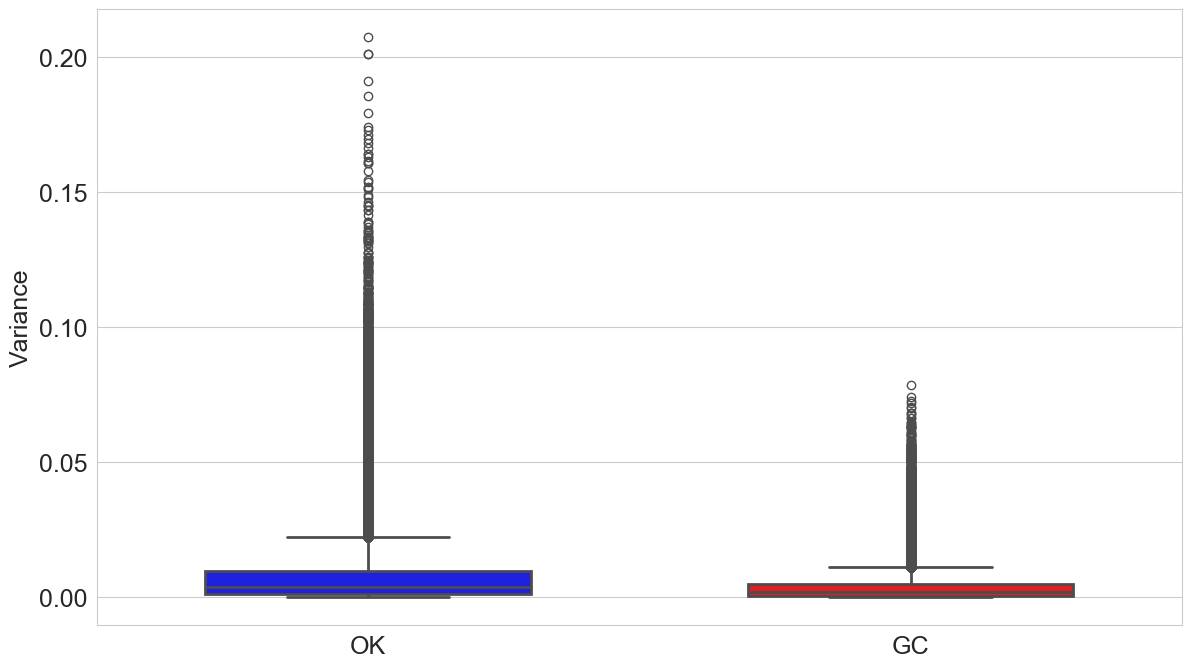

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar estilo profesional
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Configuración de colores profesionales (corregido con los nombres correctos)
colors = {
    "OK": "blue",  
    "GC": "red"  
}

# Crear boxplot con colores diferenciados
sns.boxplot(data=df_variance, width=0.6, linewidth=2, palette=colors)

# Calcular estadísticas descriptivas (percentiles, mínimo y máximo)
stats_ok = df_variance["OK"].describe(percentiles=[0.25, 0.5, 0.75])
stats_gc = df_variance["GC"].describe(percentiles=[0.25, 0.5, 0.75])

# Configurar etiquetas y título profesional
plt.xlabel("", fontsize=18)
plt.ylabel("Variance", fontsize=18)
plt.title("", fontsize=18, fontweight="bold")

# Ajustar tamaños de texto y mejorar visualización
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Guardar la figura en alta resolución
plt.savefig("Copper_Variance_Comparison_Boxplot_Styled.jpg", dpi=800, bbox_inches='tight')

# Mostrar la figura
plt.show()


In [28]:
# Calcular la varianza global de las estimaciones OK y GC
varianza_ok = df["OK_corrected"].var()
varianza_gc = df["Cu_estimated_GC_corrected"].var()

print("Varianza de OK:", varianza_ok)
print("Varianza de GC:", varianza_gc)


Varianza de OK: 0.02729516063586278
Varianza de GC: 0.01421998164110135


# FIN